### Pre-requisite

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.4f}'.format)

### Loading the Dataset

In [2]:
train_path = 'train.csv'
val_path   = 'validation.csv'
test_path  = 'test.csv'

In [3]:
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

In [4]:
combined_df = pd.concat([df_train, df_val, df_test], ignore_index=True)

### Dataset Information

combined_df.info()

In [5]:
combined_df.head(20)

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.2582,79.6652,...,2.7439,0.9068,1.0892,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.8765,59.6115,...,2.5877,0.8437,0.8799,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.0706,70.5774,...,2.4263,0.8509,1.0034,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.9093,82.9244,...,3.5582,0.9468,1.8148,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.5623,95.3523,...,3.8969,0.9880,1.1572,1,1,0,0,0,3,4
5,14,9,Female,Hispanic,1,SomeCollege,Public,Suburban,74.3237,77.6398,...,2.7289,0.8753,0.8001,1,1,0,0,0,2,2
6,16,11,Female,Black,1,SomeCollege,Private,Suburban,62.0687,71.3672,...,3.0581,0.8810,0.7854,1,0,0,1,0,3,2
7,18,12,Female,White,1,HS,Public,Suburban,73.2800,62.1644,...,2.8786,0.9137,1.5339,1,1,1,0,0,4,1
8,18,12,Female,Hispanic,1,<HS,Public,Suburban,60.5883,74.4197,...,2.8410,0.8495,0.9852,1,1,0,0,1,2,4
9,16,11,Female,White,3,HS,Public,Suburban,73.1691,80.8318,...,2.8561,0.9143,1.0882,1,0,0,0,0,3,3


### Data Cleaning and Preprocessing

In [6]:
print("Original shape:", combined_df.shape)
print("\nColumns:\n", combined_df.columns)
print("\nMissing values:\n", combined_df.isnull().sum())
combined_df.info()

Original shape: (10000000, 21)

Columns:
 Index(['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation',
       'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut'],
      dtype='object')

Missing values:
 Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data colu

In [7]:
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [8]:
cleaned_df = combined_df.copy()

label_enc = LabelEncoder()
cat_cols = ['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale']

for col in cat_cols:
    cleaned_df[col] = label_enc.fit_transform(cleaned_df[col])
    mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
    print(f"Label mapping for {col}: {mapping}")

Label mapping for Gender: {'Female': 0, 'Male': 1}
Label mapping for Race: {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Other': 3, 'Two-or-more': 4, 'White': 5}
Label mapping for ParentalEducation: {'<HS': 0, 'Bachelors+': 1, 'HS': 2, 'SomeCollege': 3}
Label mapping for SchoolType: {'Private': 0, 'Public': 1}
Label mapping for Locale: {'City': 0, 'Rural': 1, 'Suburban': 2, 'Town': 3}


### Exploratory Data Analysis

In [9]:
num_cols = ['TestScore_Math', 'TestScore_Reading', 'TestScore_Science',
            'GPA', 'AttendanceRate', 'StudyHours']

cat_cols = ['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale',  'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut']

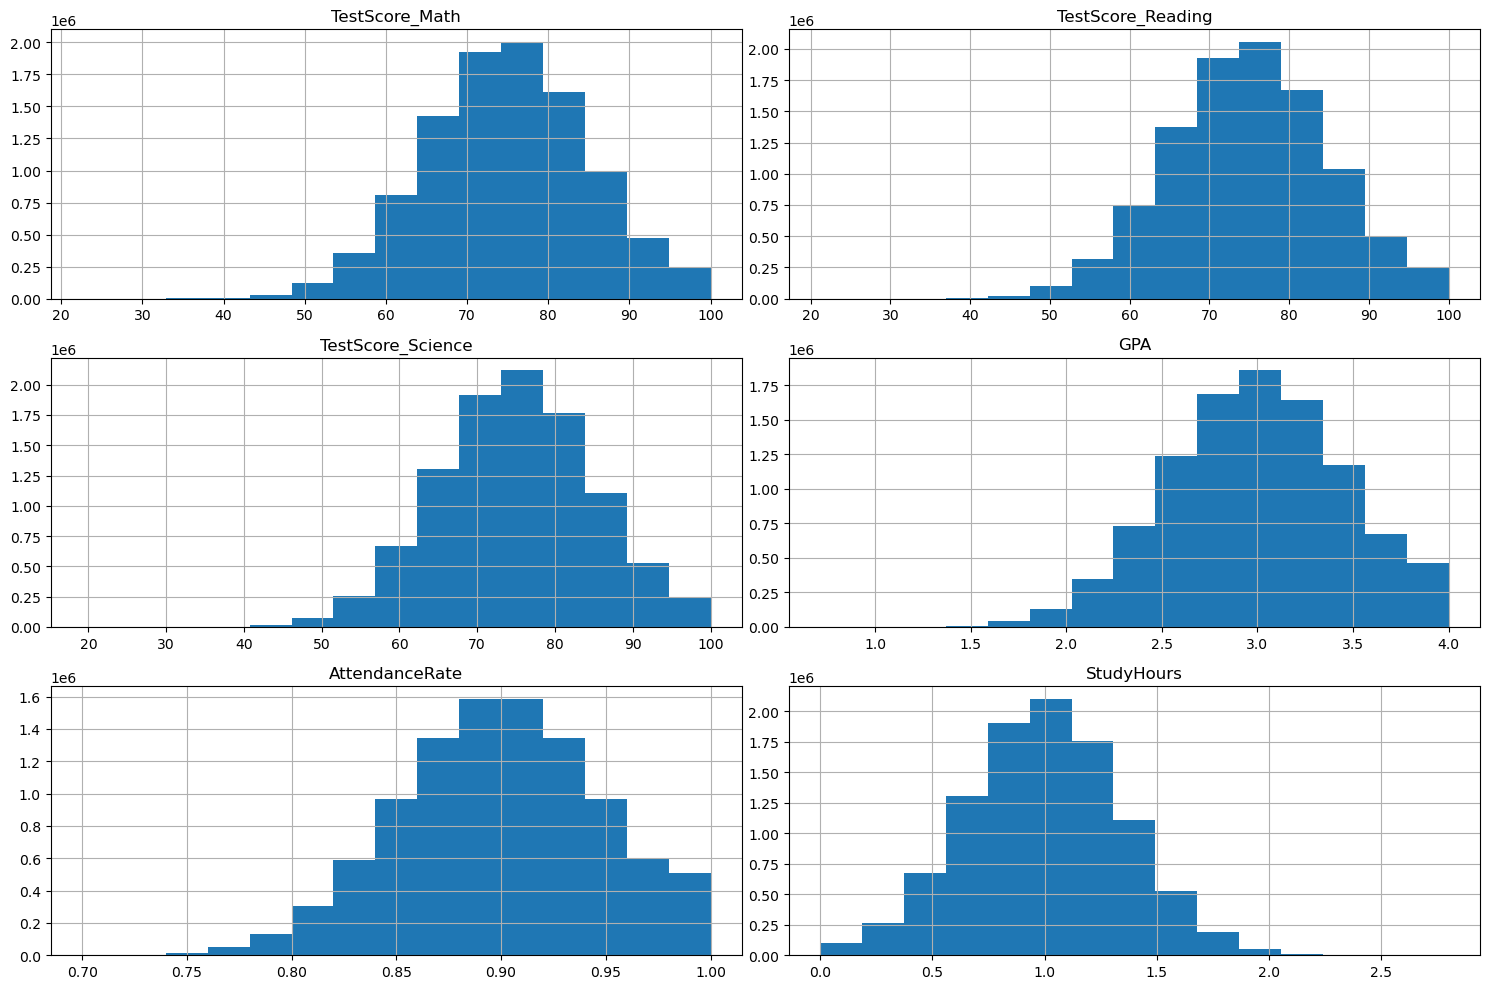

Statistical Summary of Numerical Features:
       TestScore_Math  TestScore_Reading  TestScore_Science           GPA  \
count   10000000.0000      10000000.0000      10000000.0000 10000000.0000   
mean          74.9754            74.9797            74.9792        2.9968   
std            9.9457             9.9444             9.9487        0.4596   
min           22.5768            21.1880            19.1888        0.7132   
25%           68.2456            68.2532            68.2560        2.6851   
50%           74.9962            75.0006            75.0008        2.9999   
75%           81.7427            81.7440            81.7426        3.3145   
max          100.0000           100.0000           100.0000        4.0000   

       AttendanceRate    StudyHours  
count   10000000.0000 10000000.0000  
mean           0.8996        0.9998  
std            0.0481        0.3482  
min            0.7000        0.0000  
25%            0.8669        0.7642  
50%            0.9000        0.9999

In [10]:
combined_df[num_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

print("Statistical Summary of Numerical Features:")
print(combined_df[num_cols].describe())

Frequency of Yes/No Categorical Features:



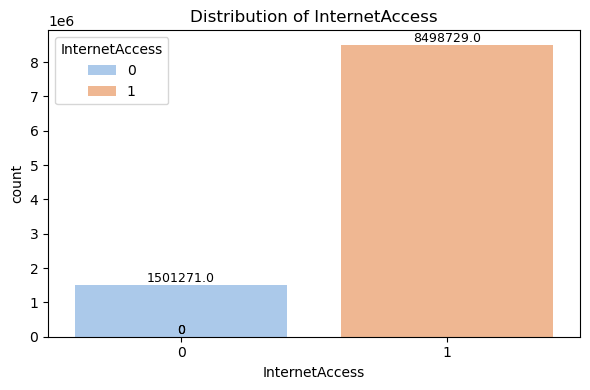

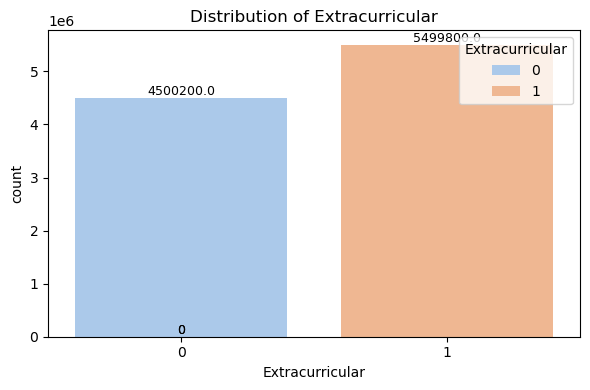

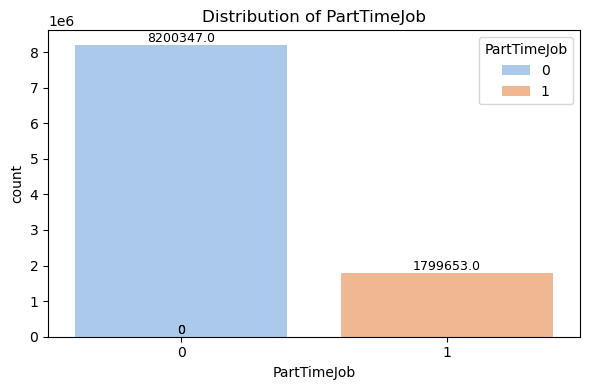

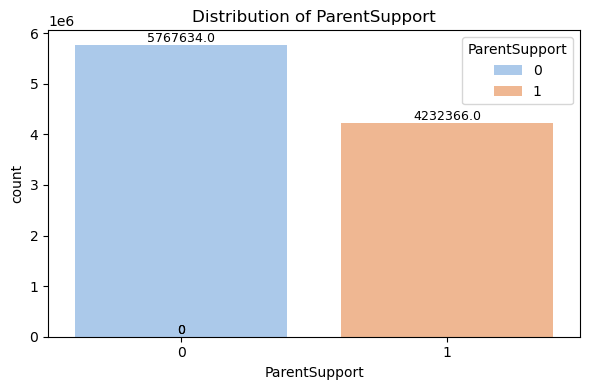

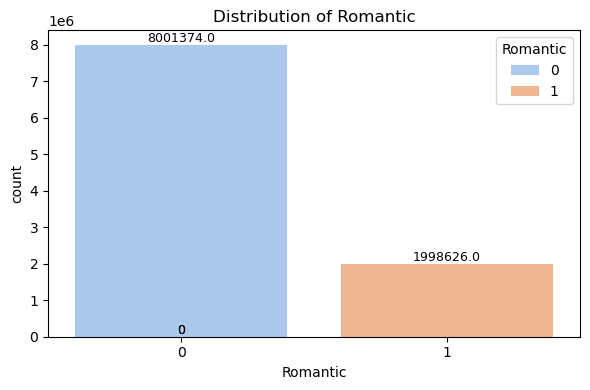

In [11]:
yes_no_cols = ['InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport','Romantic']

print("Frequency of Yes/No Categorical Features:\n")
for col in yes_no_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=combined_df, x=col, hue=col, palette="pastel")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()




Frequency of Ordinal (1-5 scale) Categorical Features:



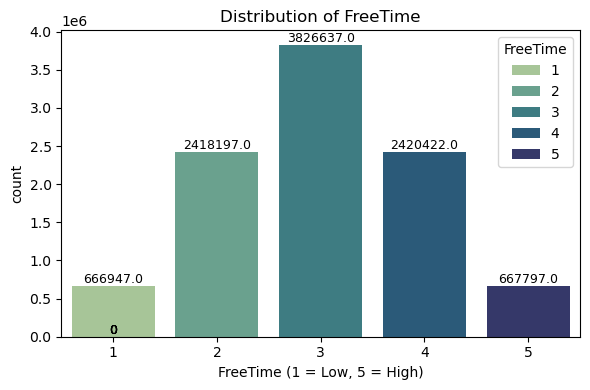

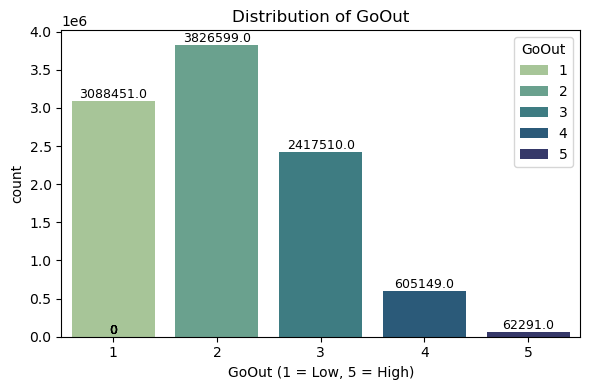

In [12]:
ordinal_cols = [ 'FreeTime', 'GoOut']

print("\nFrequency of Ordinal (1-5 scale) Categorical Features:\n")
for col in ordinal_cols:
    plt.figure(figsize=(6, 4))
    order = [1, 2, 3, 4, 5]
    ax = sns.countplot(data=combined_df, x=col, hue = col, order=order, palette="crest")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {col}')
    plt.xlabel(f"{col} (1 = Low, 5 = High)")
    plt.tight_layout()
    plt.show()

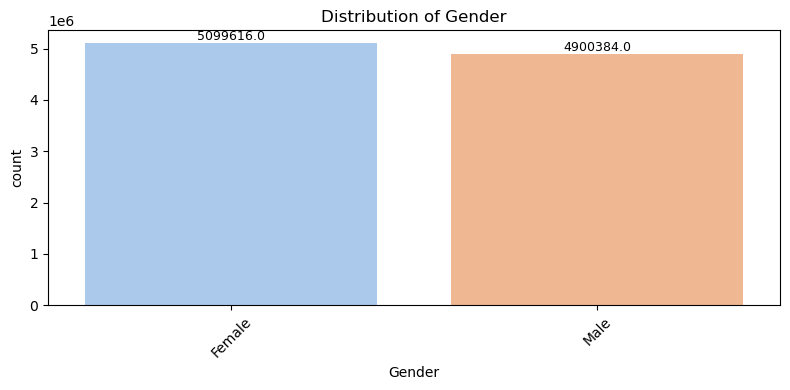

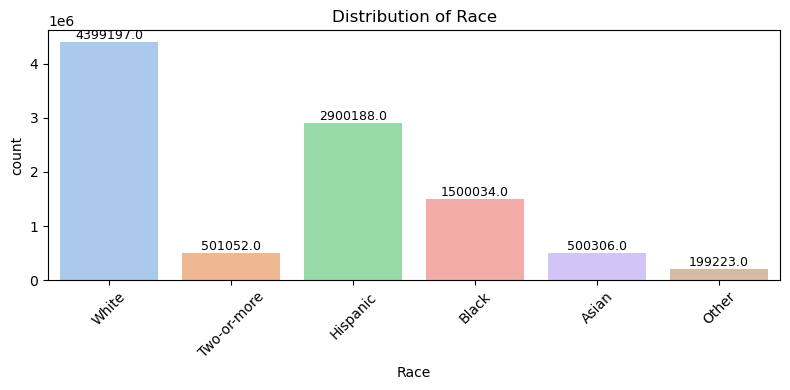

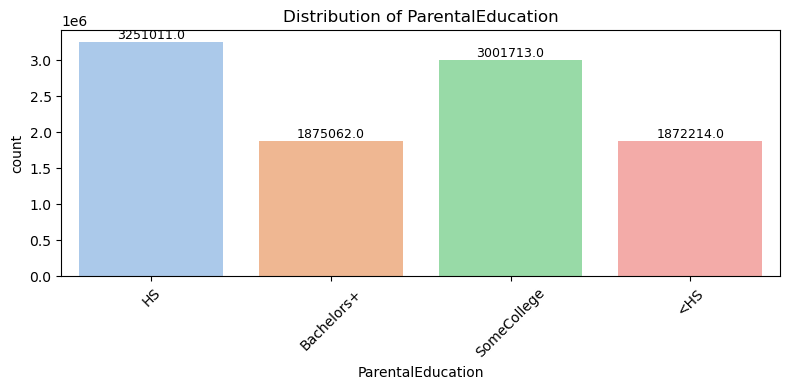

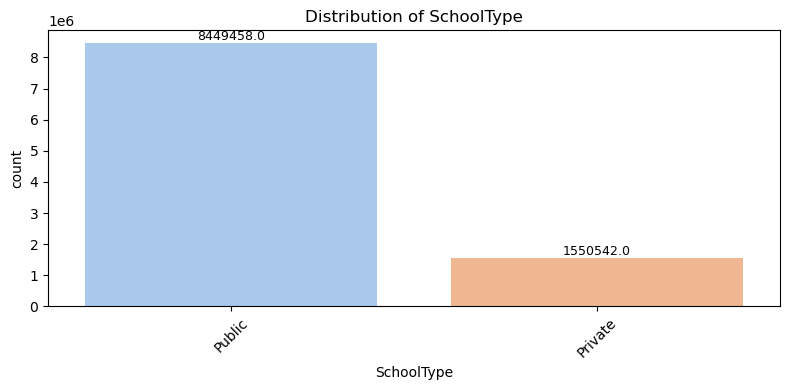

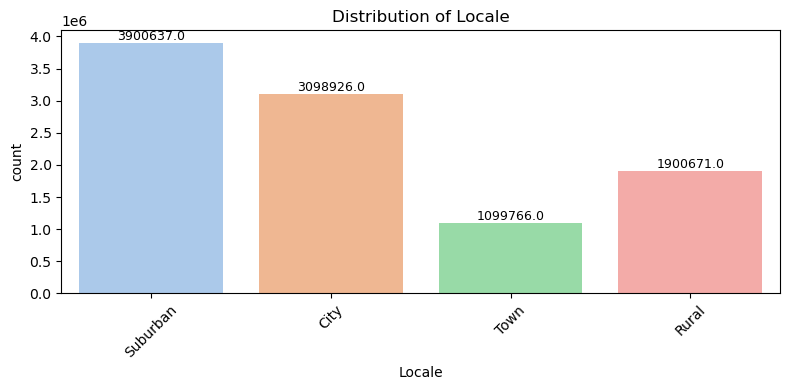

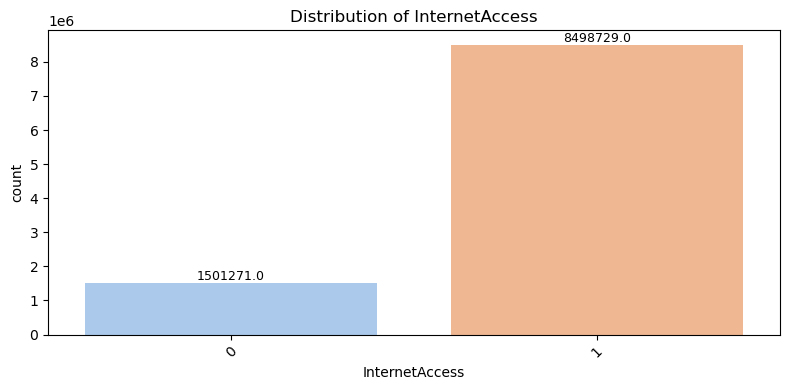

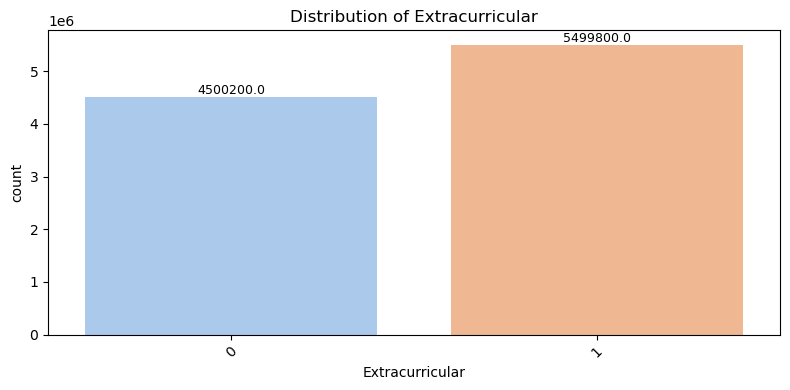

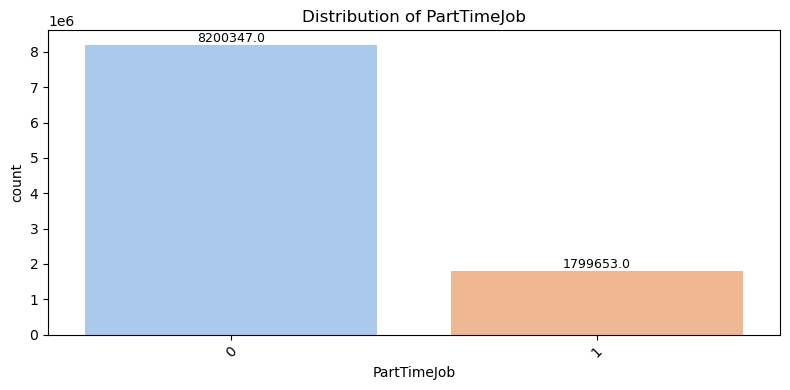

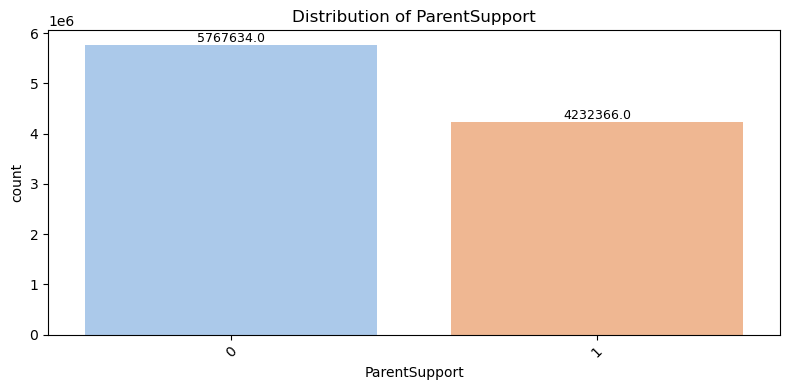

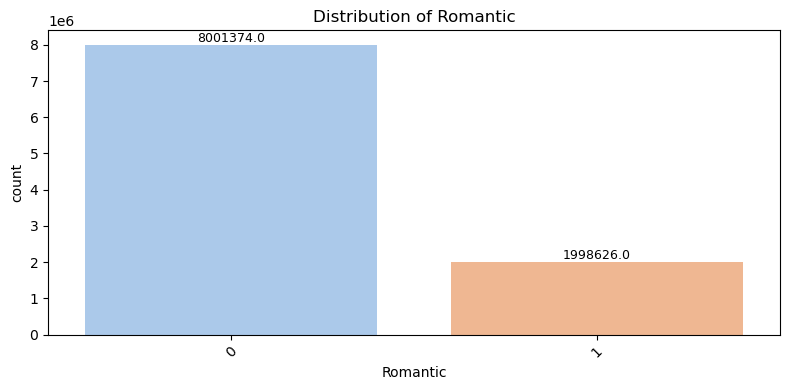

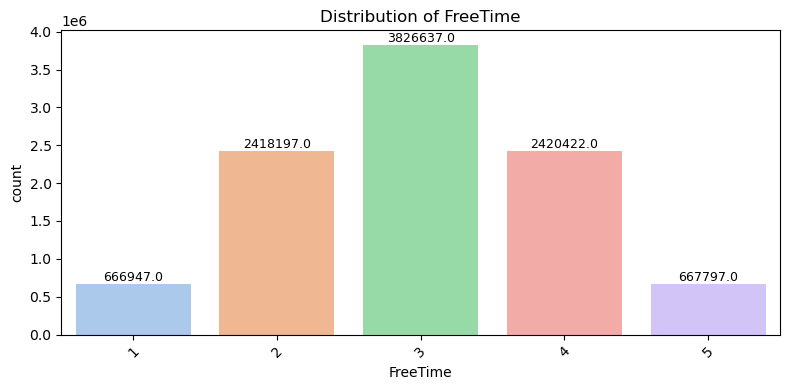

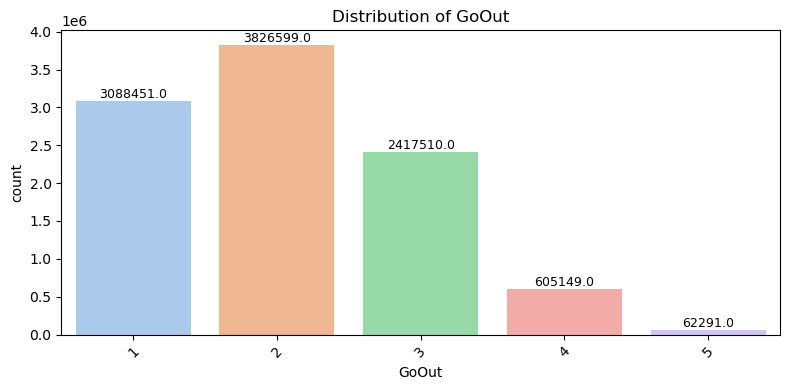

In [13]:
# Bar plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=combined_df, x=col, hue=col, palette="pastel", legend=False)

    # Add value labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


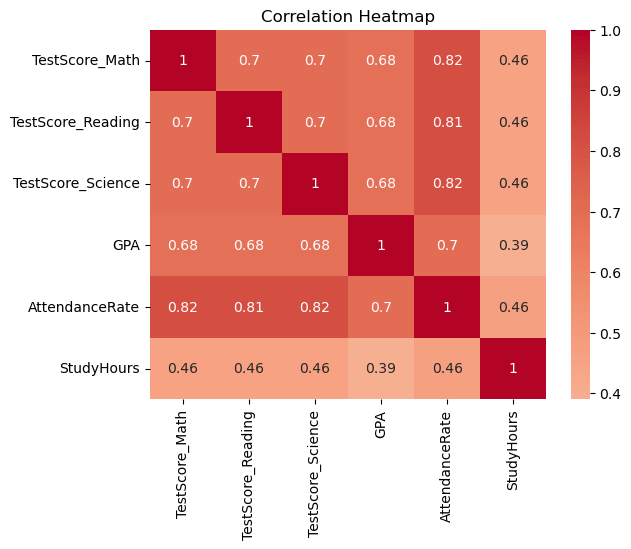

In [14]:
corr_matrix = combined_df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



Statistics for 'GPA' grouped by 'Gender':

              count   mean    std    min    25%    50%    75%    max
Gender                                                              
Female 5099616.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
Male   4900384.0000 3.0000 0.4600 0.7500 2.6900 3.0000 3.3100 4.0000


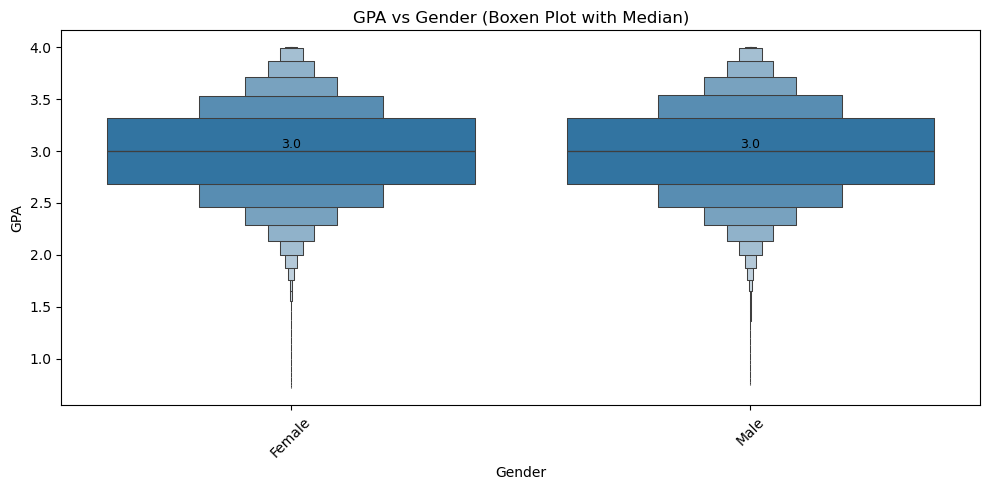


Statistics for 'GPA' grouped by 'Race':

                   count   mean    std    min    25%    50%    75%    max
Race                                                                     
Asian        500306.0000 3.0000 0.4600 0.7900 2.6900 3.0000 3.3100 4.0000
Black       1500034.0000 3.0000 0.4600 0.7900 2.6800 3.0000 3.3100 4.0000
Hispanic    2900188.0000 3.0000 0.4600 0.7600 2.6800 3.0000 3.3100 4.0000
Other        199223.0000 3.0000 0.4600 0.7500 2.6900 3.0000 3.3200 4.0000
Two-or-more  501052.0000 3.0000 0.4600 0.8700 2.6800 3.0000 3.3100 4.0000
White       4399197.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000


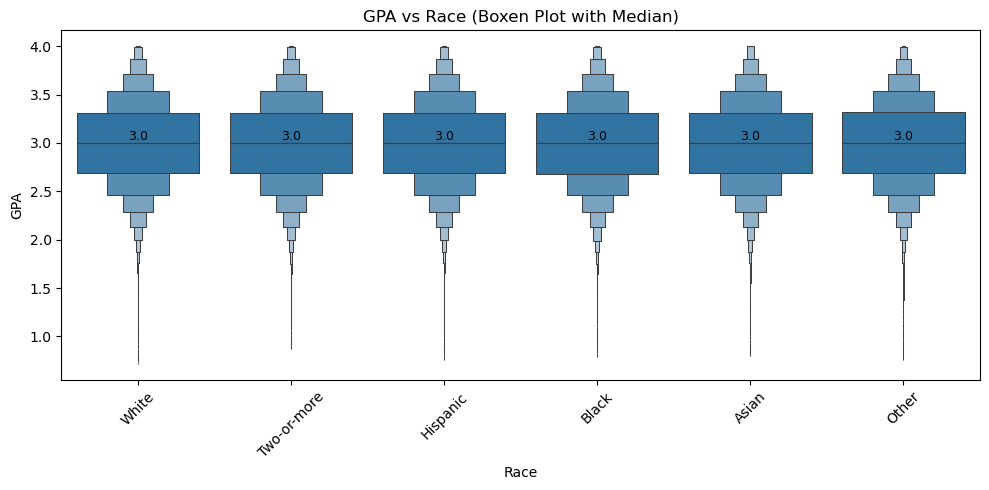


Statistics for 'GPA' grouped by 'ParentalEducation':

                         count   mean    std    min    25%    50%    75%  \
ParentalEducation                                                          
<HS               1872214.0000 3.0000 0.4600 0.7100 2.6800 3.0000 3.3100   
Bachelors+        1875062.0000 3.0000 0.4600 0.8400 2.6900 3.0000 3.3100   
HS                3251011.0000 3.0000 0.4600 0.7600 2.6900 3.0000 3.3100   
SomeCollege       3001713.0000 3.0000 0.4600 0.7400 2.6800 3.0000 3.3100   

                     max  
ParentalEducation         
<HS               4.0000  
Bachelors+        4.0000  
HS                4.0000  
SomeCollege       4.0000  


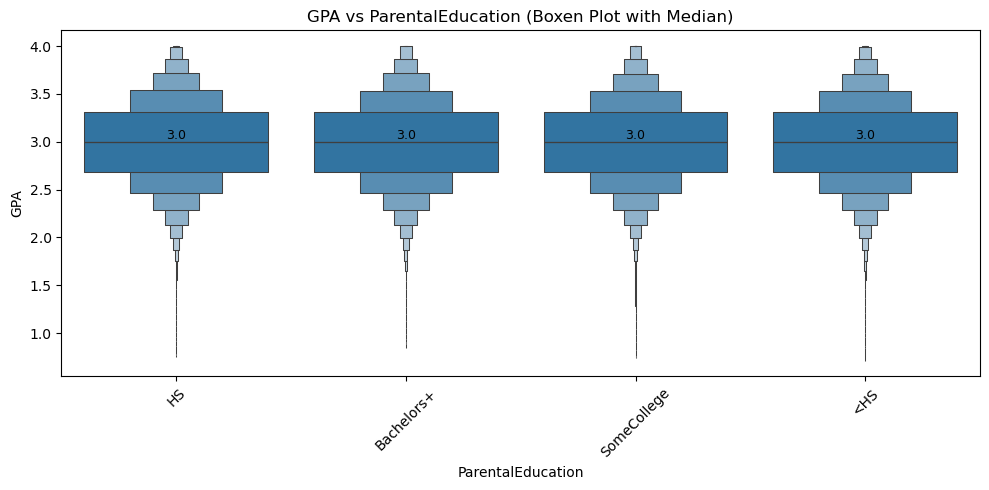


Statistics for 'GPA' grouped by 'SchoolType':

                  count   mean    std    min    25%    50%    75%    max
SchoolType                                                              
Private    1550542.0000 3.0000 0.4600 0.7600 2.6900 3.0000 3.3100 4.0000
Public     8449458.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000


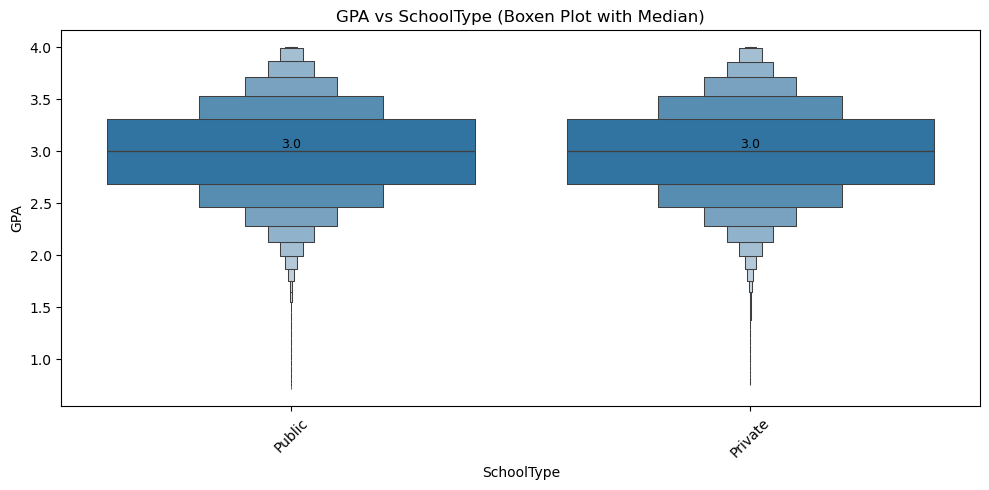


Statistics for 'GPA' grouped by 'Locale':

                count   mean    std    min    25%    50%    75%    max
Locale                                                                
City     3098926.0000 3.0000 0.4600 0.7400 2.6900 3.0000 3.3100 4.0000
Rural    1900671.0000 3.0000 0.4600 0.7500 2.6900 3.0000 3.3200 4.0000
Suburban 3900637.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
Town     1099766.0000 3.0000 0.4600 0.7500 2.6800 3.0000 3.3100 4.0000


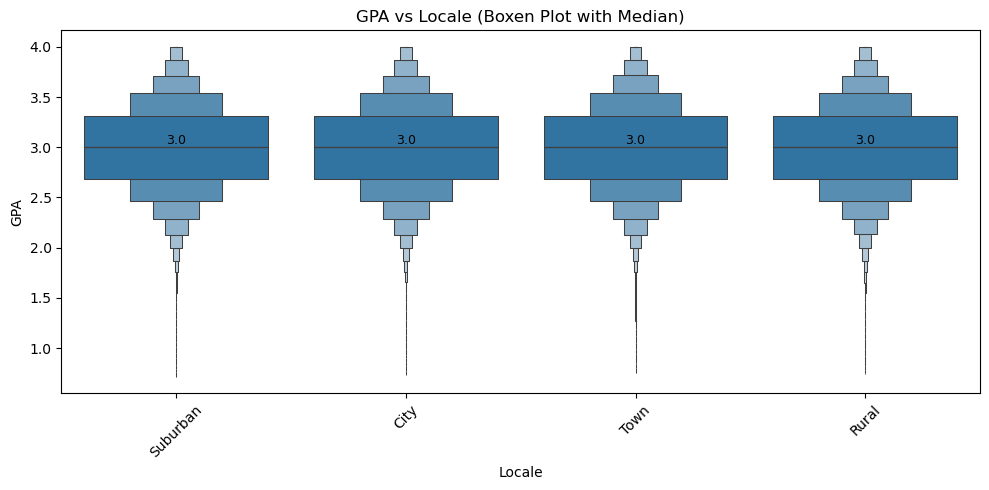


Statistics for 'GPA' grouped by 'InternetAccess':

                      count   mean    std    min    25%    50%    75%    max
InternetAccess                                                              
0              1501271.0000 3.0000 0.4600 0.7500 2.6800 3.0000 3.3100 4.0000
1              8498729.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000


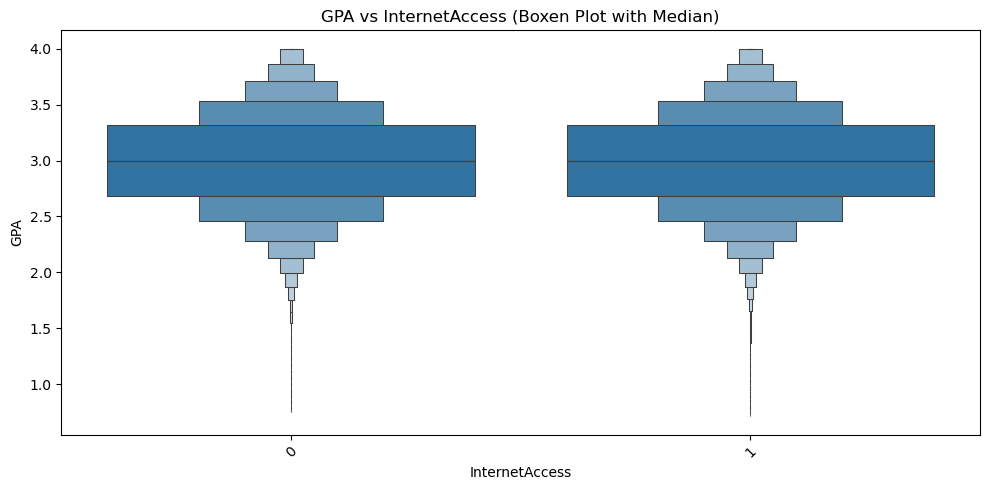


Statistics for 'GPA' grouped by 'Extracurricular':

                       count   mean    std    min    25%    50%    75%    max
Extracurricular                                                              
0               4500200.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
1               5499800.0000 3.0000 0.4600 0.7500 2.6900 3.0000 3.3100 4.0000


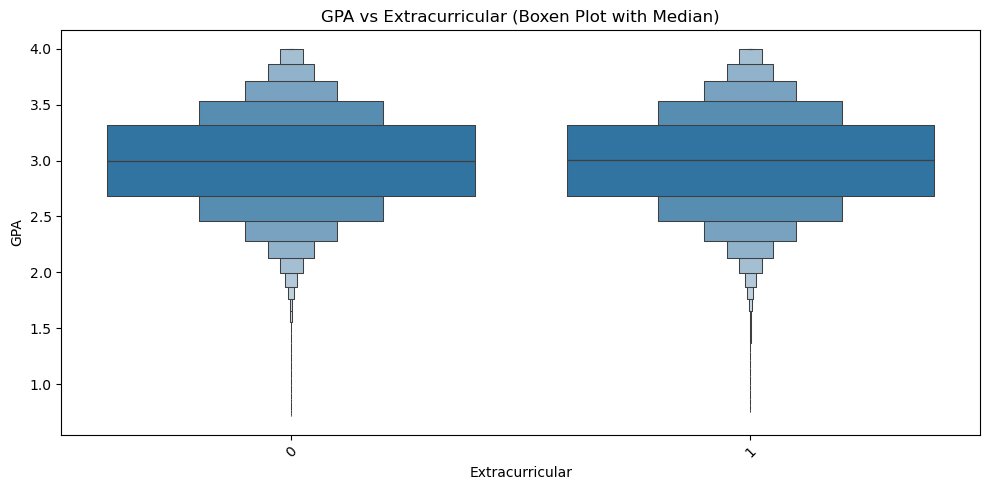


Statistics for 'GPA' grouped by 'PartTimeJob':

                   count   mean    std    min    25%    50%    75%    max
PartTimeJob                                                              
0           8200347.0000 3.0000 0.4600 0.7400 2.6900 3.0000 3.3100 4.0000
1           1799653.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000


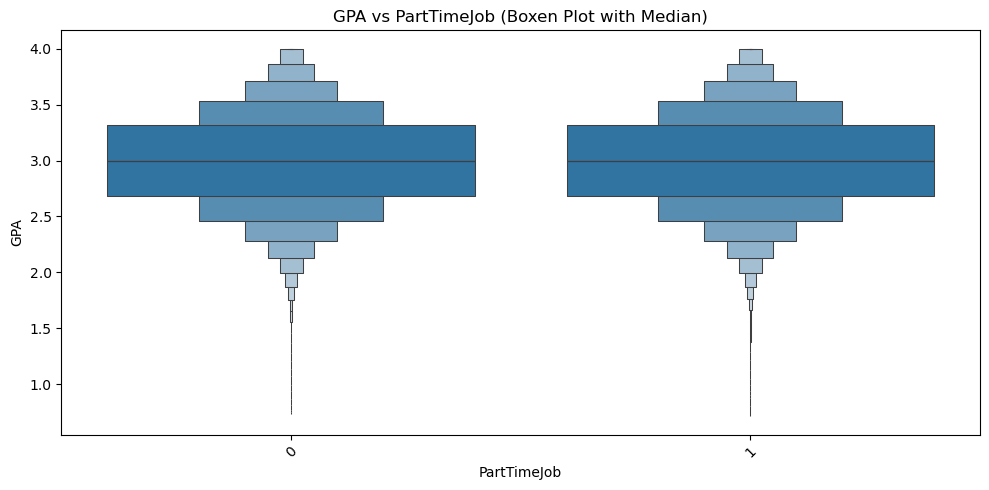


Statistics for 'GPA' grouped by 'ParentSupport':

                     count   mean    std    min    25%    50%    75%    max
ParentSupport                                                              
0             5767634.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
1             4232366.0000 3.0000 0.4600 0.7400 2.6900 3.0000 3.3100 4.0000


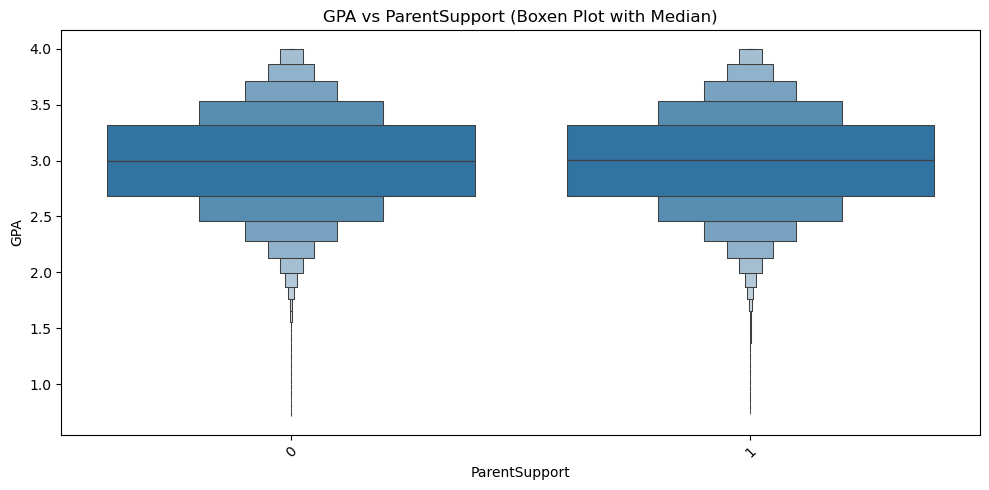


Statistics for 'GPA' grouped by 'Romantic':

                count   mean    std    min    25%    50%    75%    max
Romantic                                                              
0        8001374.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
1        1998626.0000 3.0000 0.4600 0.7400 2.6900 3.0000 3.3100 4.0000


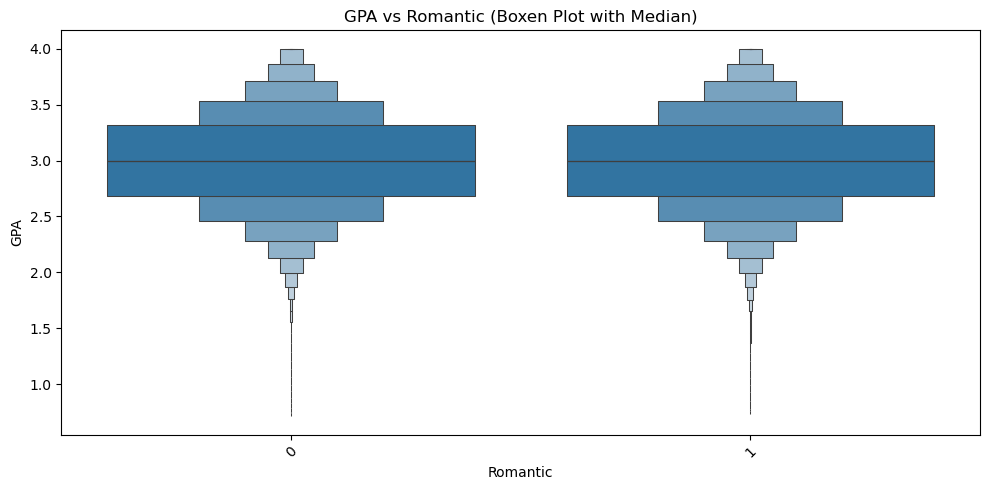


Statistics for 'GPA' grouped by 'FreeTime':

                count   mean    std    min    25%    50%    75%    max
FreeTime                                                              
1         666947.0000 3.0000 0.4600 0.8400 2.6900 3.0000 3.3100 4.0000
2        2418197.0000 3.0000 0.4600 0.7500 2.6800 3.0000 3.3200 4.0000
3        3826637.0000 3.0000 0.4600 0.7100 2.6900 3.0000 3.3100 4.0000
4        2420422.0000 3.0000 0.4600 0.7400 2.6800 3.0000 3.3100 4.0000
5         667797.0000 3.0000 0.4600 0.8400 2.6900 3.0000 3.3100 4.0000


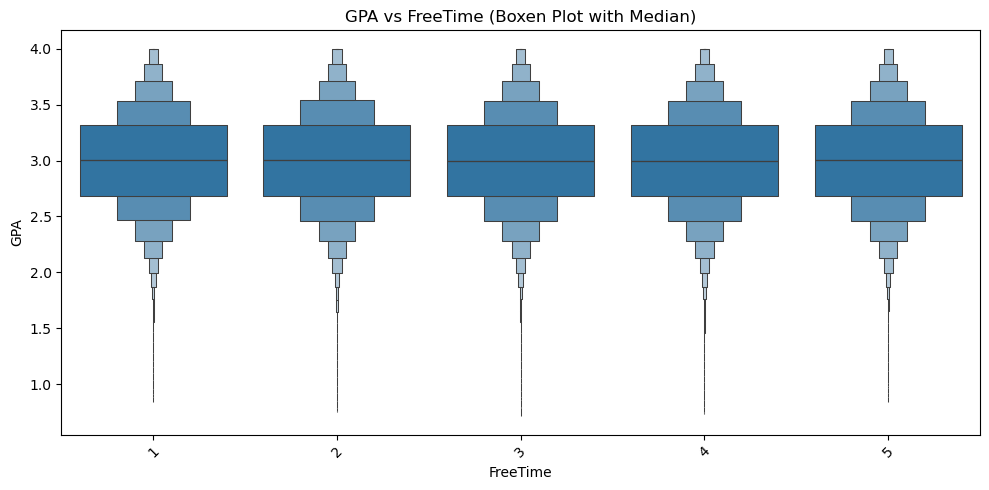


Statistics for 'GPA' grouped by 'GoOut':

             count   mean    std    min    25%    50%    75%    max
GoOut                                                              
1     3088451.0000 3.0000 0.4600 0.7400 2.6800 3.0000 3.3100 4.0000
2     3826599.0000 3.0000 0.4600 0.7500 2.6800 3.0000 3.3100 4.0000
3     2417510.0000 3.0000 0.4600 0.8100 2.6900 3.0000 3.3100 4.0000
4      605149.0000 3.0000 0.4600 0.7900 2.6900 3.0000 3.3100 4.0000
5       62291.0000 3.0000 0.4600 0.7100 2.6800 3.0000 3.3200 4.0000


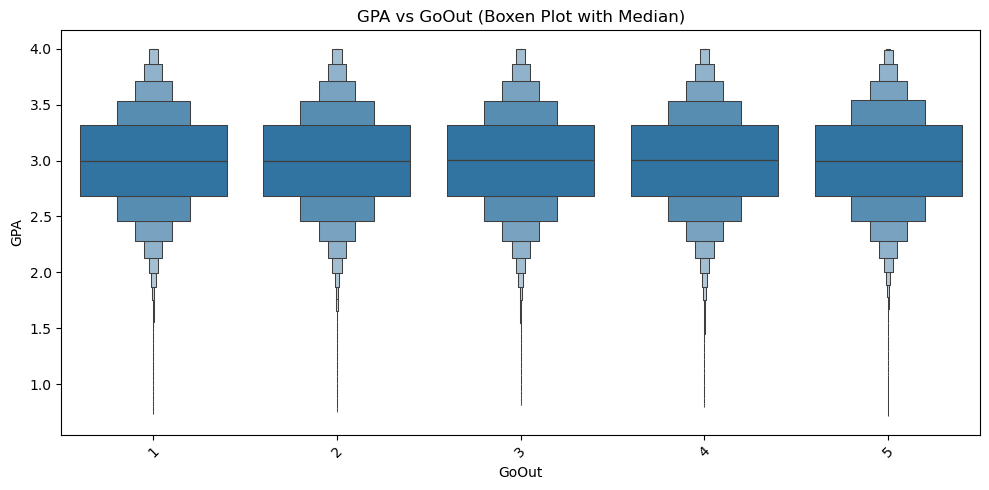

In [15]:
for cat in cat_cols:
    for num in ['GPA']:
        # 1. Print Statistical Summary
        print(f"\nStatistics for '{num}' grouped by '{cat}':\n")
        stats = combined_df.groupby(cat)[num].describe().round(2)
        print(stats)

        # 2. Plot Boxen Plot
        plt.figure(figsize=(10, 5))
        ax = sns.boxenplot(data=combined_df, x=cat, y=num, k_depth='full')

        # Annotate Medians
        xtick_labels = [t.get_text() for t in ax.get_xticklabels()]
        medians = combined_df.groupby(cat)[num].median()

        for i, label in enumerate(xtick_labels):
            if label in medians:
                val = round(medians[label], 2)
                ax.text(i, val, f'{val}', ha='center', va='bottom', color='black', fontsize=9)

        plt.title(f'{num} vs {cat} (Boxen Plot with Median)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [16]:
def plot_crosstab_heatmap(df, col1, col2, normalize=False, figsize=(6, 4)):
    ct = pd.crosstab(df[col1], df[col2], normalize='index' if normalize else False)
    fmt = '.1f' if normalize else 'd'
    cmap = 'YlGnBu' if normalize else 'Blues'
    
    if normalize:
        ct *= 100  # Convert to percentage

    plt.figure(figsize=figsize)
    sns.heatmap(ct, annot=True, fmt=fmt, cmap=cmap)
    plt.title(f'{col1} vs {col2}' + (' (%)' if normalize else ''))
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()


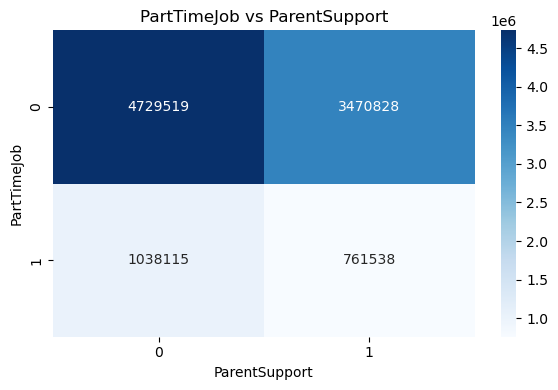

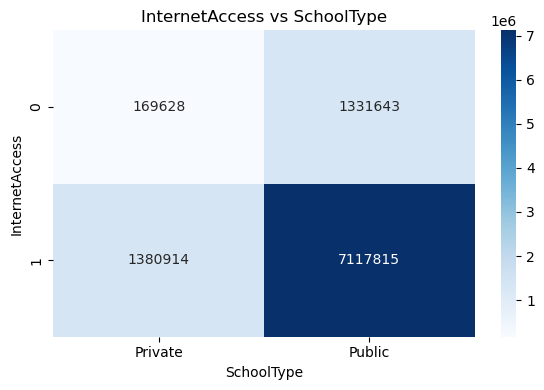

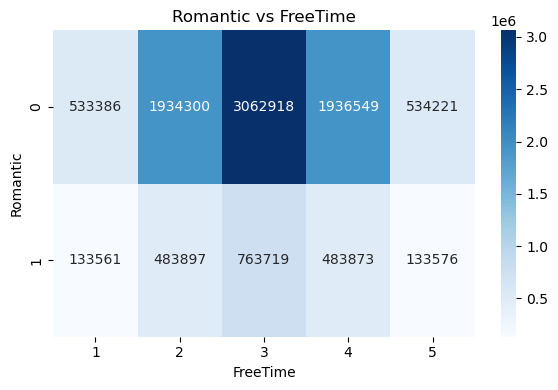

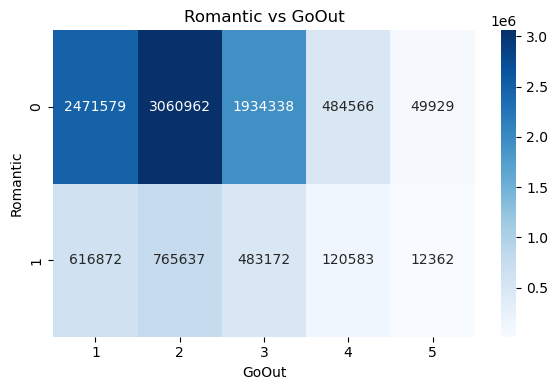

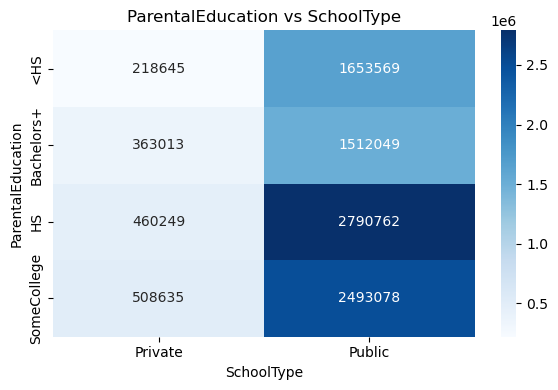

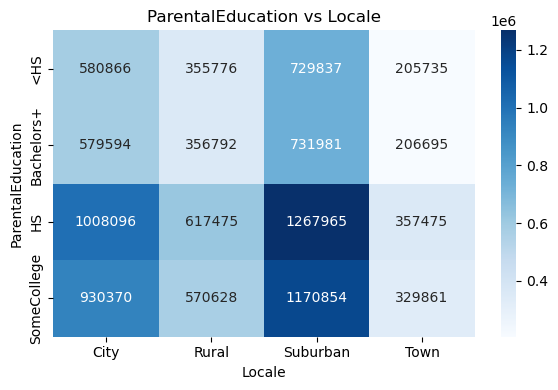

In [17]:
# Pair 1: PartTimeJob vs ParentSupport
plot_crosstab_heatmap(combined_df, 'PartTimeJob', 'ParentSupport')


# Pair 2: InternetAccess vs SchoolType
plot_crosstab_heatmap(combined_df, 'InternetAccess', 'SchoolType')


# Pair 3: Romantic vs FreeTime
plot_crosstab_heatmap(combined_df, 'Romantic', 'FreeTime')


# Pair 4: Romantic vs GoOut
plot_crosstab_heatmap(combined_df, 'Romantic', 'GoOut')

# Pair 5: ParentalEducation vs SchoolType
plot_crosstab_heatmap(combined_df, 'ParentalEducation', 'SchoolType')

# Pair 6: ParentalEducation vs Locale
plot_crosstab_heatmap(combined_df, 'ParentalEducation', 'Locale')



### Research Question